# 1. Análise explortória de dados


#### a. Carregue a base de dados media_precos_carros_brasil.csv

In [551]:
# importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [552]:
# Carregando dados do arquivo precos_carros_brasil
dados = pd.read_csv('precos_carros_brasil.csv')

In [553]:
# Listando o nome das colunas
dados.columns

Index(['year_of_reference', 'month_of_reference', 'fipe_code',
       'authentication', 'brand', 'model', 'fuel', 'gear', 'engine_size',
       'year_model', 'avg_price_brl'],
      dtype='object')

In [554]:
# Imprimindo somente as cinco primeiras linhas
dados.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0


In [555]:
# Imprime o tipo de dado de cada coluna
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [556]:
# Imprimindo o tipo de dado de cada coluna após conversões
dados.dtypes

year_of_reference     float64
month_of_reference     object
fipe_code              object
authentication         object
brand                  object
model                  object
fuel                   object
gear                   object
engine_size            object
year_model            float64
avg_price_brl         float64
dtype: object

In [557]:
# Número de linhas e colunas
dados.shape

(267542, 11)

#### b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes

In [558]:
# verificando se há valores faltantes nos dados
dados.isna().any()

year_of_reference     True
month_of_reference    True
fipe_code             True
authentication        True
brand                 True
model                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [559]:
# verificando a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     65245
month_of_reference    65245
fipe_code             65245
authentication        65245
brand                 65245
model                 65245
fuel                  65245
gear                  65245
engine_size           65245
year_model            65245
avg_price_brl         65245
dtype: int64

pelo o resultado é possível supor que pode haver um grande número de linhas inteiramente vazias

In [560]:
# verificando se há linhas inteiramente vazias e quantas existem
dados.isnull().all(axis=1).sum()

65245

In [561]:
# Removendo todas as linhas que teem em todos os seus campos valores faltantes
dados.dropna(axis=0, how='all', inplace=True)

In [562]:
# Após correções, verificando novamente se há linhas inteiramente vazias e quantas existem
dados.isnull().all(axis=1).sum()

0

In [563]:
# Após correções, verificando novamente a quantidade de valores faltantes por coluna
dados.isna().sum()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64

#### c. Verifique se há dados duplicados nos dados

In [564]:
# Verificando se há dados duplicados
dados.duplicated().sum()

2

In [565]:
# Removendo dados duplicados
dados.drop_duplicates(inplace=True)

In [566]:
# Verificando se ainda há dados duplicados após remoção dos dados duplicados
dados.duplicated().sum()

0

#### d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [567]:
# Convertendo engine_size de object para float64
dados['engine_size'] = dados['engine_size'].str.replace(',', '.').astype(float)

In [568]:
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [569]:
# Imprimindo alguns valores de medidas de tendências centrais
dados[numericas_cols].describe()

,year_of_reference,engine_size,year_model,avg_price_brl
count,202295.000000,202295.000000,202295.000000,202295.000000
mean,2021.564695,1.822302,2011.271514,52756.765713
std,0.571904,0.734432,6.376241,51628.912116
min,2021.000000,1.000000,2000.000000,6647.000000
25%,2021.000000,1.400000,2006.000000,22855.000000
50%,2022.000000,1.600000,2012.000000,38027.000000
75%,2022.000000,2.000000,2016.000000,64064.000000
max,2023.000000,6.200000,2023.000000,979358.000000


In [570]:
# Imprimindo resumos de variáveis categóricas - estatística descritiva
dados[categoricas_cols].describe()

,month_of_reference,fipe_code,authentication,brand,model,fuel,gear
count,202295,202295,202295,202295,202295,202295,202295
unique,12,2091,202295,6,2112,3,2
top,January,003281-6,cfzlctzfwrcp,Fiat,Palio Week. Adv/Adv TRYON 1.8 mpi Flex,Gasoline,manual
freq,24260,425,1,44962,425,168684,161883


---
# 2. Visualização de dados

#### a. Gere um gráfico da distribuição da quantidade de carros por marca

In [571]:
# Determinar a quantidade de elementos para cada marca de carro
dados['brand'].value_counts()

brand
Fiat               44962
VW - VolksWagen    44312
GM - Chevrolet     38590
Ford               33150
Renault            29191
Nissan             12090
Name: count, dtype: int64

Text(0, 0.5, 'Total de carros')

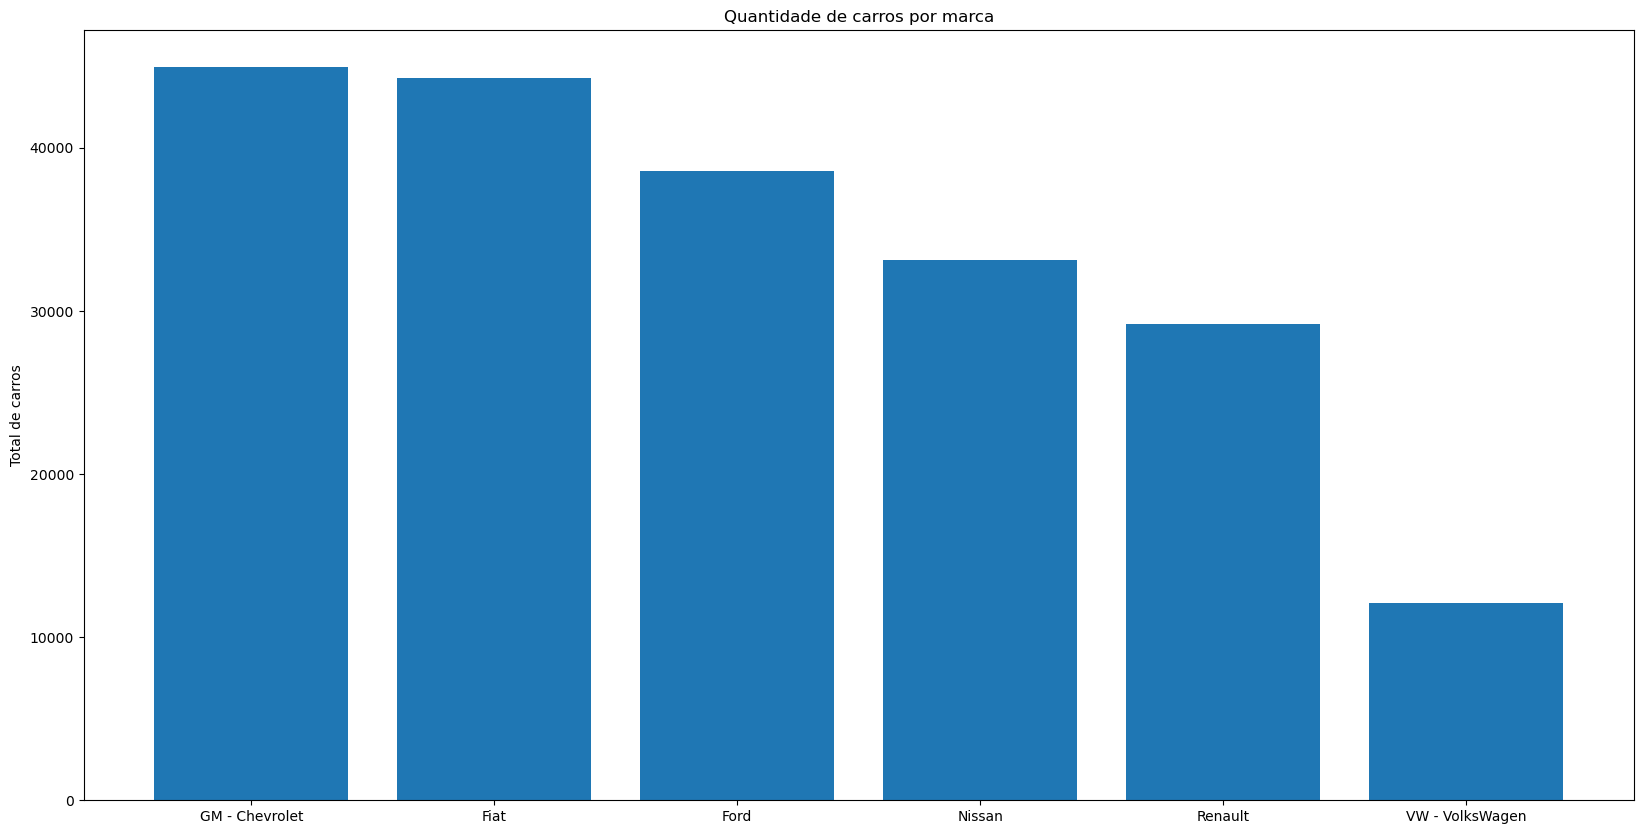

In [572]:
# Gráfico da distribuição da quantidade de carros por marca
plt.figure(figsize=(20,10)) # Tamanho da imagem do gráfico
plt.bar(dados['brand'].unique(), dados['brand'].value_counts()) # gráfico de barras - eixos X e Y
plt.title('Quantidade de carros por marca') # inserir título no gráfico
plt.ylabel('Total de carros') # inserir rótulo no eixo Y

#### b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro


In [573]:
# Determinar a quantidade de carros para cada tipo de engrenagem do carro (câmbio)
dados['gear'].value_counts()

gear
manual       161883
automatic     40412
Name: count, dtype: int64

Text(0, 0.5, 'Número de carros')

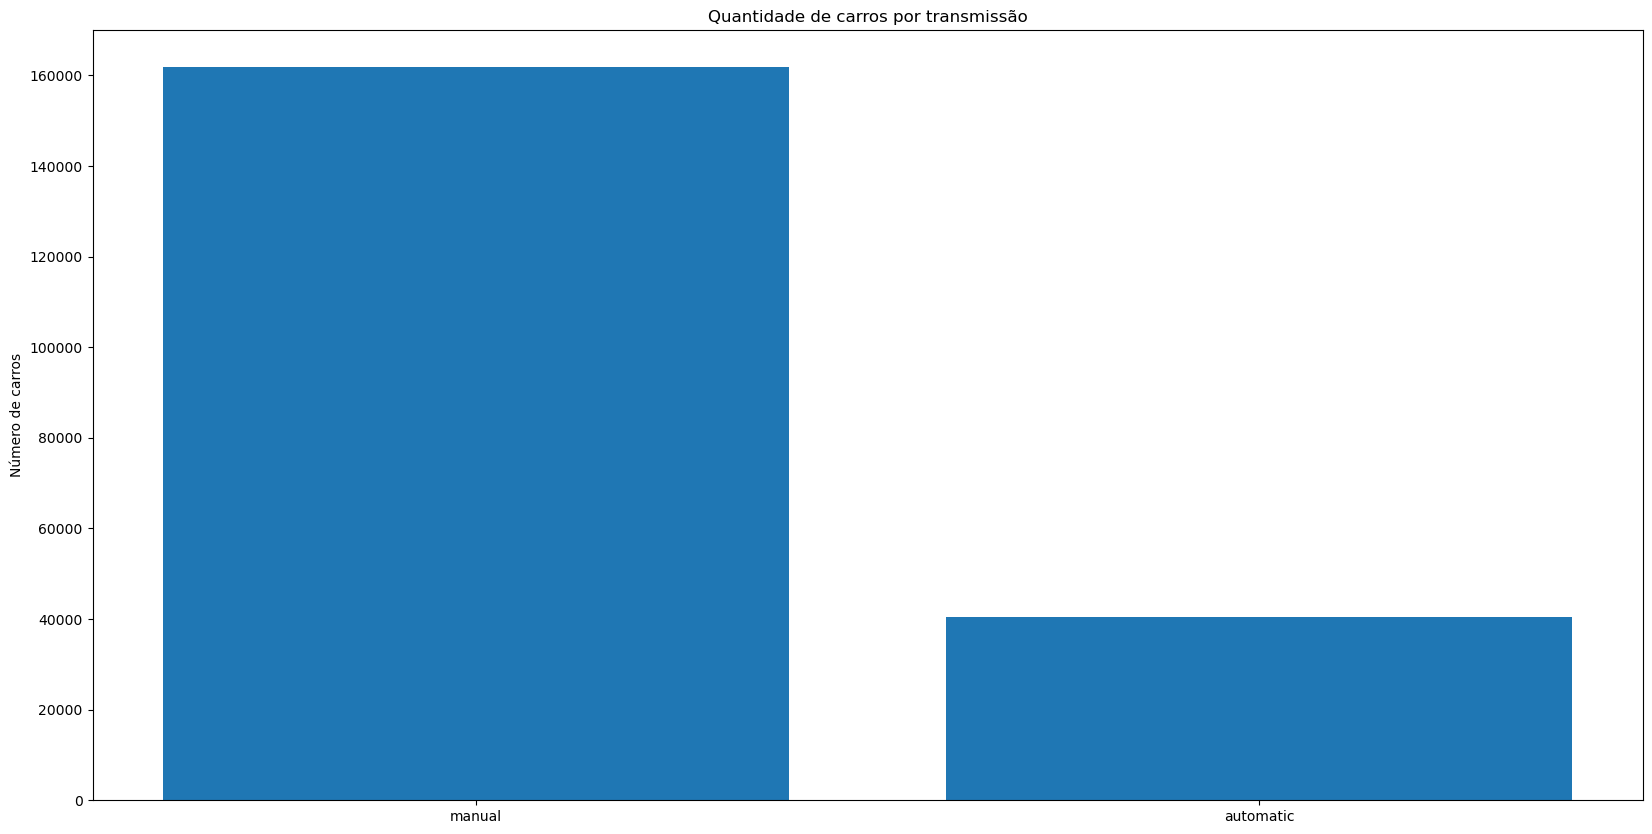

In [574]:
# Gráfico da distribuição de carros por tipo de engrenagem de carro (câmbio)
plt.figure(figsize=(20,10)) # Tamanho da imagem do gráfico
plt.bar(dados['gear'].unique(), dados['gear'].value_counts()) # gráfico de barras - eixos X e Y
plt.title('Quantidade de carros por transmissão') # inserir título no gráfico
plt.ylabel('Número de carros') # inserir rótulo no eixo Y

#### c.  Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [575]:
# Arrendondar ano de referência - remover a parte decimal
dados['year_of_reference'] = dados['year_of_reference'].round().astype(int)

In [576]:
# Obter somente carros do ano de 2022
cars_in_2022 = dados[dados['year_of_reference'] == 2022]
cars_in_2022.head()

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
96280,2022,January,004001-0,gzw0hkct8cj4,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2002.0,12330.0
96281,2022,January,004001-0,gm2ws5yqjnfx,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2001.0,11408.0
96282,2022,January,004001-0,gbvgy7432kp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1.0,2000.0,10620.0
96283,2022,January,004001-0,gvx412fg8v0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1.0,2000.0,11992.0
96284,2022,January,004003-7,jtskpmg524fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,1.6,2001.0,17182.0


In [577]:
# Definir a ordem dos meses customizada
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [578]:
# Agrupar os preços médios dos carros em cada mês
cars_in_2022['month_of_reference'] = pd.Categorical(cars_in_2022['month_of_reference'], categories=month_order, ordered=True)
cars_avg_price_in_2022 = cars_in_2022.groupby(['month_of_reference', 'brand'])['avg_price_brl'].mean().round(0)
cars_avg_price_in_2022.head()

month_of_reference  brand         
January             Fiat              45370.0
                    Ford              62027.0
                    GM - Chevrolet    64387.0
                    Nissan            72589.0
                    Renault           48007.0
Name: avg_price_brl, dtype: float64

In [579]:
# Utilizando a função reset_index para criar uma ordem e facilitar a criação do gráfico
cars_avg_price_in_2022 = cars_avg_price_in_2022.reset_index(name='average_price')
cars_avg_price_in_2022.head()

,month_of_reference,brand,average_price
0,January,Fiat,45370.0
1,January,Ford,62027.0
2,January,GM - Chevrolet,64387.0
3,January,Nissan,72589.0
4,January,Renault,48007.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

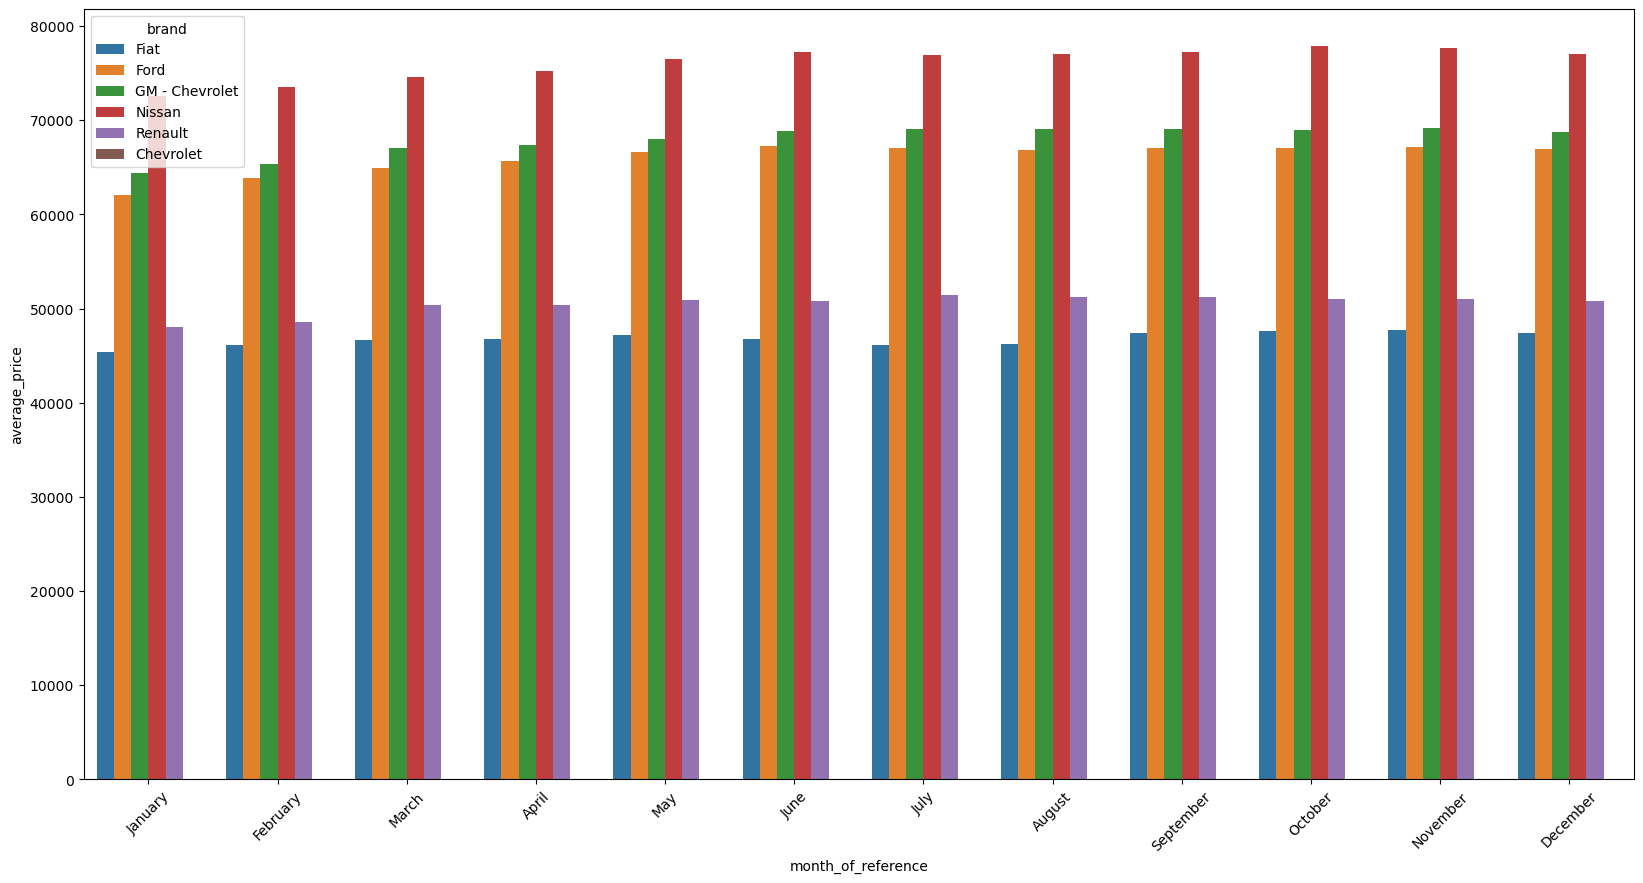

In [580]:
plt.figure(figsize=(20,10))
sns.barplot(x='month_of_reference', y='average_price', hue='brand', data=cars_avg_price_in_2022, hue_order=['Fiat', 'Ford', 'GM - Chevrolet', 'Nissan', 'Renault', 'Chevrolet'])
plt.xticks(rotation=45)